In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
#Read original images
img1 = cv2.imread('images/image1.jpg')
img2 = cv2.imread('images/image2.jpg')
img3 = cv2.imread('images/image3.jpg')
img4 = cv2.imread('images/image4.jpg')

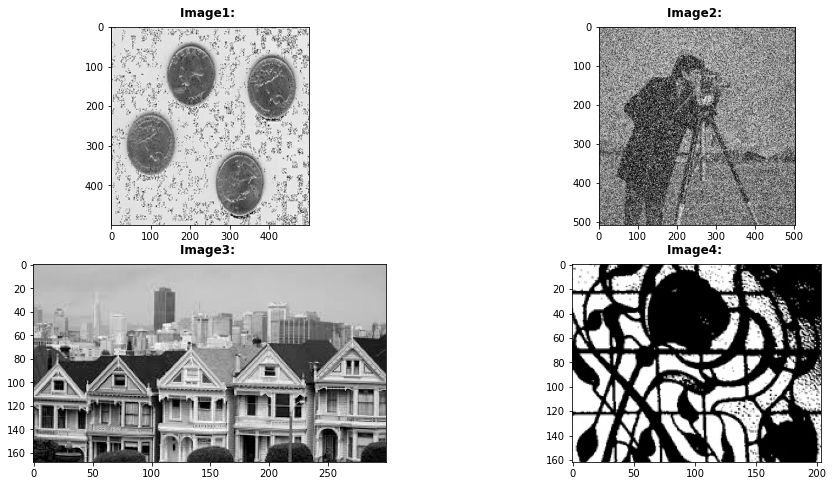

In [108]:
# Display the two images
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1), plt.imshow(img1)
plt.title('Image1: ', fontsize='large', fontweight='bold', pad=10)
plt.subplot(2, 2, 2), plt.imshow(img2)
plt.title('Image2: ', fontsize='large', fontweight='bold', pad=10)
plt.subplot(2, 2, 3), plt.imshow(img3)
plt.title('Image3: ', fontsize='large', fontweight='bold', pad=10)
plt.subplot(2, 2, 4), plt.imshow(img4)
plt.title('Image4: ', fontsize='large', fontweight='bold', pad=10)
plt.show()

# Average Filter

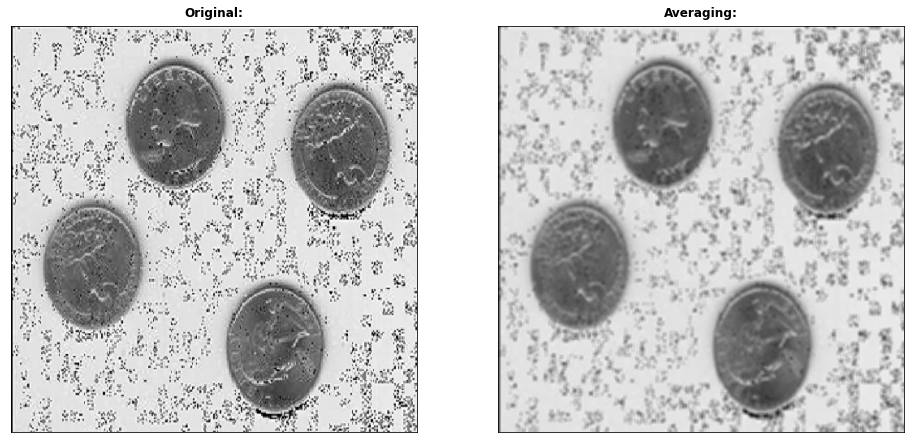

In [116]:
kernel = np.ones((5,5), np.float32)/25

average = cv2.filter2D(img1,-1,kernel)

plt.figure(figsize=(16, 8))

plt.subplot(121),plt.imshow(img1),plt.title('Original:', fontsize='large', fontweight='bold', pad=10)
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(average),plt.title('Averaging:', fontsize='large', fontweight='bold', pad=10)
plt.xticks([]), plt.yticks([])
plt.show()

# Median Filter

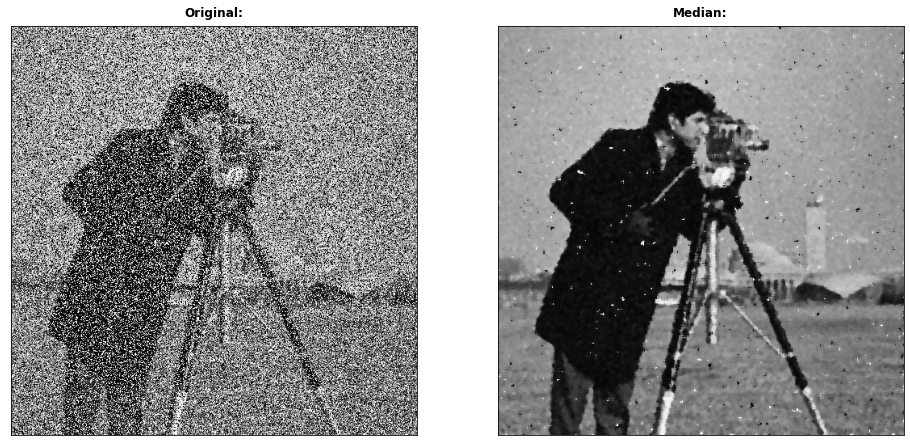

In [94]:
median = cv2.medianBlur(img2,5)

plt.figure(figsize=(16, 8))

plt.subplot(121),plt.imshow(img2),plt.title('Original:', fontsize='large', fontweight='bold', pad=10)
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Median:', fontsize='large', fontweight='bold', pad=10)
plt.xticks([]), plt.yticks([])
plt.show()

# Laplacian Filter

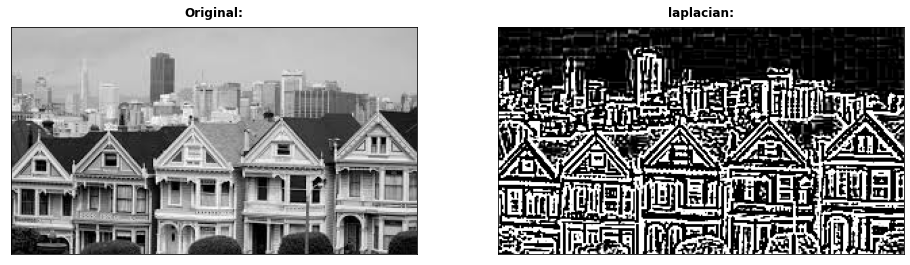

In [118]:
laplacian = cv2.Laplacian(img3, ddepth=0 , ksize=5)

plt.figure(figsize=(16, 8))

plt.subplot(121),plt.imshow(img3),plt.title('Original:', fontsize='large', fontweight='bold', pad=10)
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(laplacian),plt.title('laplacian:', fontsize='large', fontweight='bold', pad=10)
plt.xticks([]), plt.yticks([])
plt.show()

# Sobel(X and Y) Filter

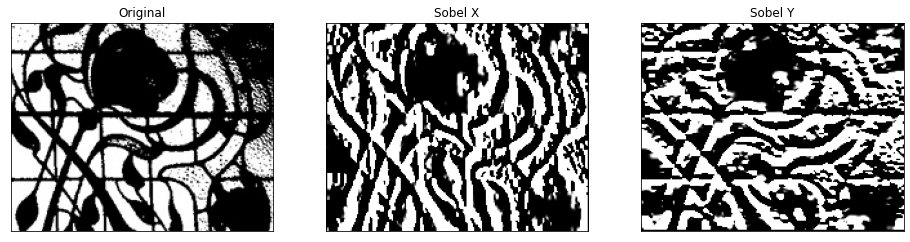

In [96]:
sobelx = cv2.Sobel(img4, 0, 1, 0, ksize=7)
sobely = cv2.Sobel(img4, 0, 0, 1, ksize=7)

plt.figure(figsize=(16, 8))

plt.subplot(1,3,1),plt.imshow(img4)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

# Filtering in Frequency Domain

In [97]:
img5 = cv2.imread("images/image5.jpg", 0)

img_c2 = np.fft.fft2(img5)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

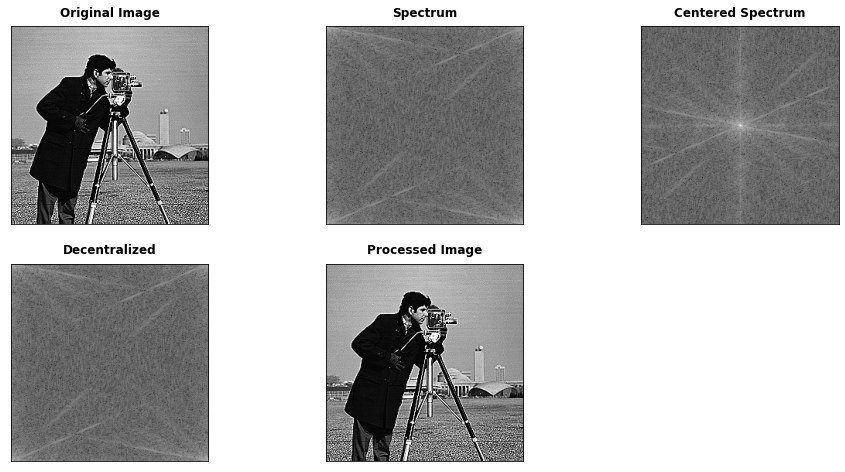

In [98]:
plt.figure(figsize=(16, 8))

plt.subplot(2,3,1), plt.imshow(img5, cmap='gray')
plt.title("Original Image", fontsize='large', fontweight='bold', pad=10), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,2), plt.imshow(np.log(1+np.abs(img_c2)), cmap='gray')
plt.title("Spectrum", fontsize='large', fontweight='bold', pad=10), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,3), plt.imshow(np.log(1+np.abs(img_c3)), cmap='gray')
plt.title("Centered Spectrum", fontsize='large', fontweight='bold', pad=10), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,4), plt.imshow(np.log(1+np.abs(img_c4)), cmap='gray')
plt.title("Decentralized", fontsize='large', fontweight='bold', pad=10), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,5), plt.imshow(np.abs(img_c5), cmap='gray')
plt.title("Processed Image", fontsize='large', fontweight='bold', pad=10), plt.xticks([]), plt.yticks([])

plt.show()

# Ideal Low Pass Filter / Ideal High Pass Filter

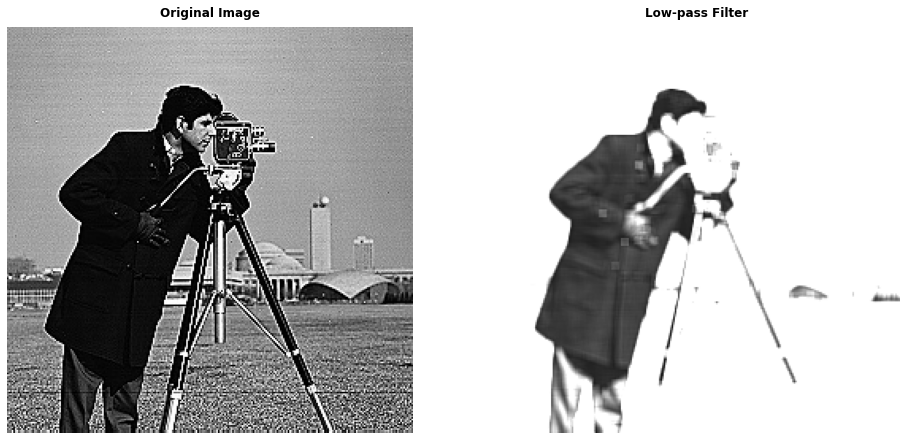

In [129]:
#Read image
img5 = cv2.imread('images/image5.jpg')

#prepare the 5x5 shaped filter
kernel = np.array([[1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1]])

kernel = kernel/sum(kernel)

#filter the source image
img_rst = cv2.filter2D(img,-1,kernel)


#Display original image and low-pass filter processed image
plt.figure(figsize=(16, 8))
plt.subplot(121), plt.imshow(img, 'gray')
plt.title('Original Image', fontsize='large', fontweight='bold', pad=10)
plt.axis('off')
plt.subplot(122), plt.imshow(img_rst, 'gray')
plt.title('Low-pass Filter', fontsize='large', fontweight='bold', pad=10)
plt.axis('off')
plt.show()

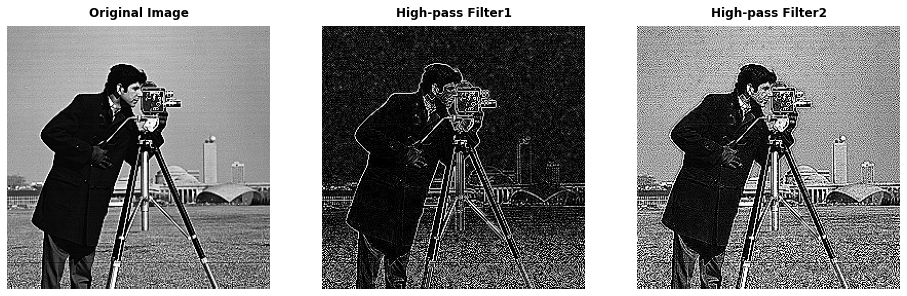

In [128]:
#Read image
img = cv2.imread('images/image5.jpg')

#edge detection filter
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 4.0, -1.0],
                   [0.0, -1.0, 0.0]])

kernel2 = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 5.0, -1.0],
                   [0.0, -1.0, 0.0]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)
kernel2 = kernel2/(np.sum(kernel2) if np.sum(kernel2)!=0 else 1)

#filter the source image
img_rst = cv2.filter2D(img,-1,kernel)
img_rst2 = cv2.filter2D(img,-1,kernel2)

#Display original image and high-pass filter processed image
plt.figure(figsize=(16, 8))
plt.subplot(131), plt.imshow(img, 'gray')
plt.title('Original Image', fontsize='large', fontweight='bold', pad=10)
plt.axis('off')
plt.subplot(132), plt.imshow(img_rst, 'gray')
plt.title('High-pass Filter1', fontsize='large', fontweight='bold', pad=10)
plt.axis('off')
plt.subplot(133), plt.imshow(img_rst2, 'gray')
plt.title('High-pass Filter2', fontsize='large', fontweight='bold', pad=10)
plt.axis('off')
plt.show()

# Gaussian Smoothing

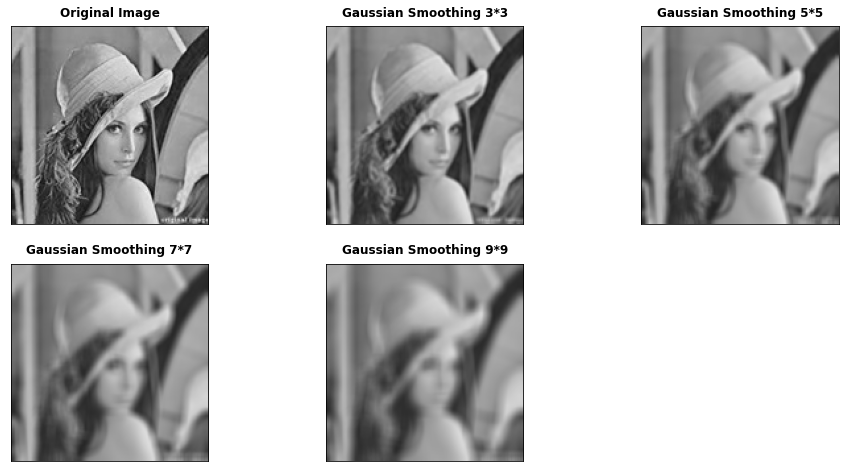

In [101]:
#Read image
img6 = cv2.imread('images/image6.jpg')

blur3 = cv2.blur(img6,(3,3))
blur5 = cv2.blur(img6,(5,5))
blur7 = cv2.blur(img6,(7,7))
blur9 = cv2.blur(img6,(9,9))


plt.figure(figsize=(16, 8))

plt.subplot(2,3,1), plt.imshow(img6, cmap='gray')
plt.title("Original Image", fontsize='large', fontweight='bold', pad=10), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,2), plt.imshow(blur3, cmap='gray')
plt.title("Gaussian Smoothing 3*3", fontsize='large', fontweight='bold', pad=10), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,3), plt.imshow(blur5, cmap='gray')
plt.title("Gaussian Smoothing 5*5", fontsize='large', fontweight='bold', pad=10), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,4), plt.imshow(blur7, cmap='gray')
plt.title("Gaussian Smoothing 7*7", fontsize='large', fontweight='bold', pad=10), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,5), plt.imshow(blur9, cmap='gray')
plt.title("Gaussian Smoothing 9*9", fontsize='large', fontweight='bold', pad=10), plt.xticks([]), plt.yticks([])

plt.show()